In [87]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
file_path ='collegePlacement - collegePlace.csv'
df = pd.read_csv(file_path)
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,reference
0,22.0,Male,Electronics And Communication,1,8.0,1.0,1.0,1.0,1.0
1,21.0,Female,Computer Science,0,7.0,1.0,1.0,1.0,1.0
2,22.0,Female,Information Technology,1,6.0,0.0,0.0,1.0,1.0
3,21.0,Male,Information Technology,0,8.0,0.0,1.0,1.0,1.0
4,22.0,Male,Mechanical,0,8.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2961,23.0,Male,Information Technology,0,7.0,0.0,0.0,0.0,NaN
2962,23.0,Male,Mechanical,1,7.0,1.0,0.0,0.0,NaN
2963,22.0,Male,Information Technology,1,7.0,0.0,0.0,0.0,NaN
2964,22.0,Male,Computer Science,1,7.0,0.0,0.0,0.0,NaN


# **Visualization**

Used techniques: matplotlib and seaborn

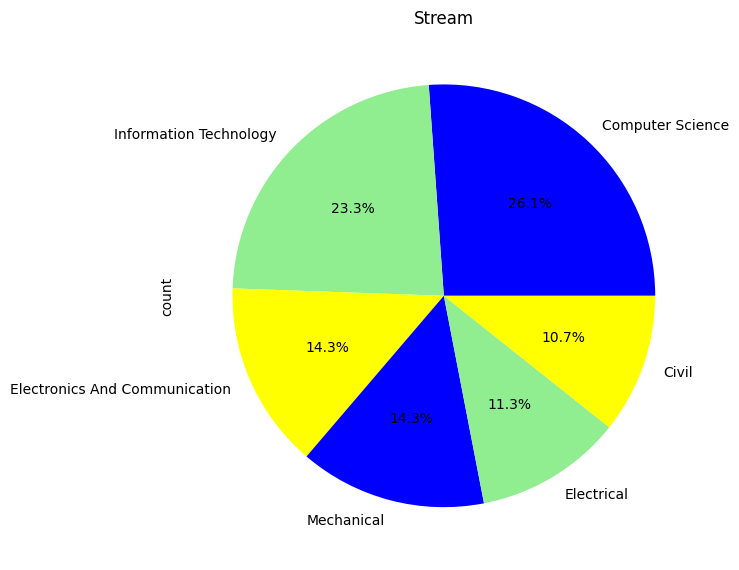

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
df['Stream'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'lightgreen','yellow'])
plt.title('Stream')
plt.show()

<Axes: xlabel='Stream', ylabel='count'>

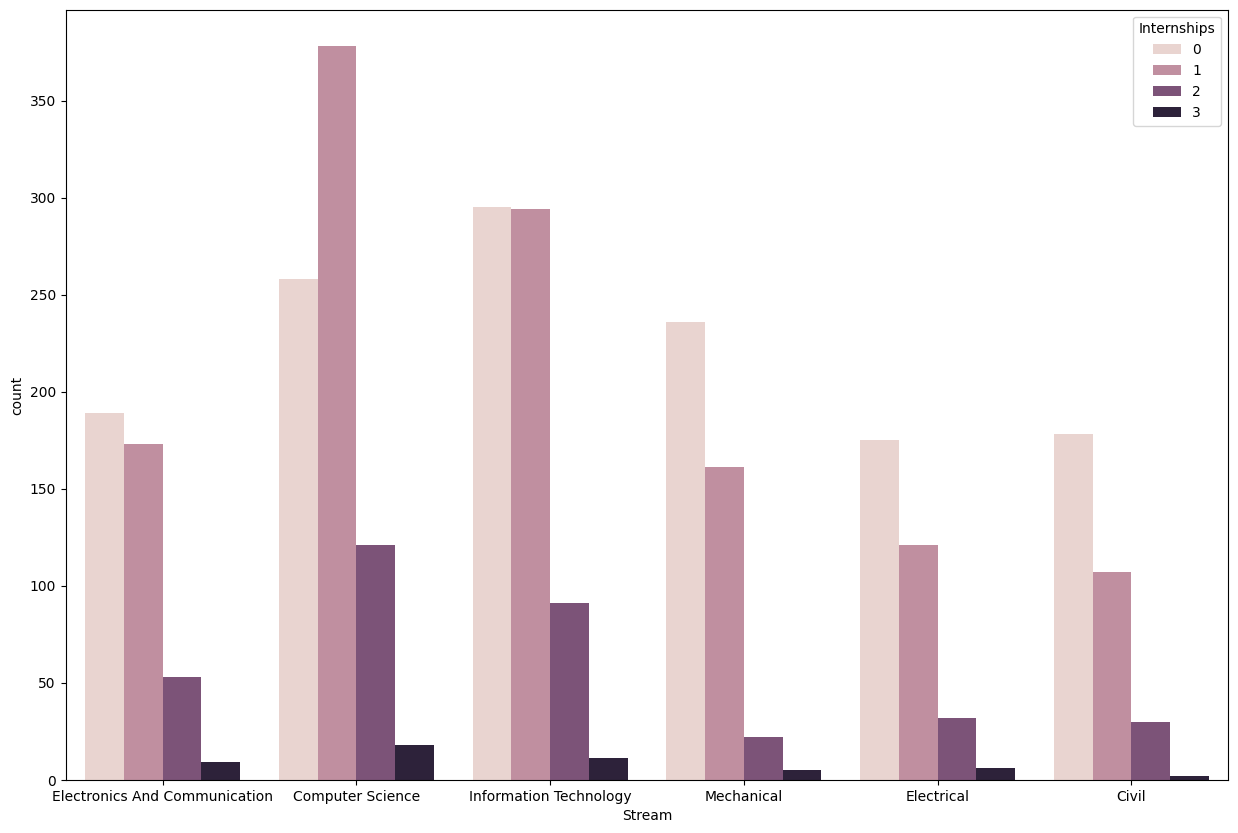

In [89]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(x='Stream',data=df,hue='Internships')

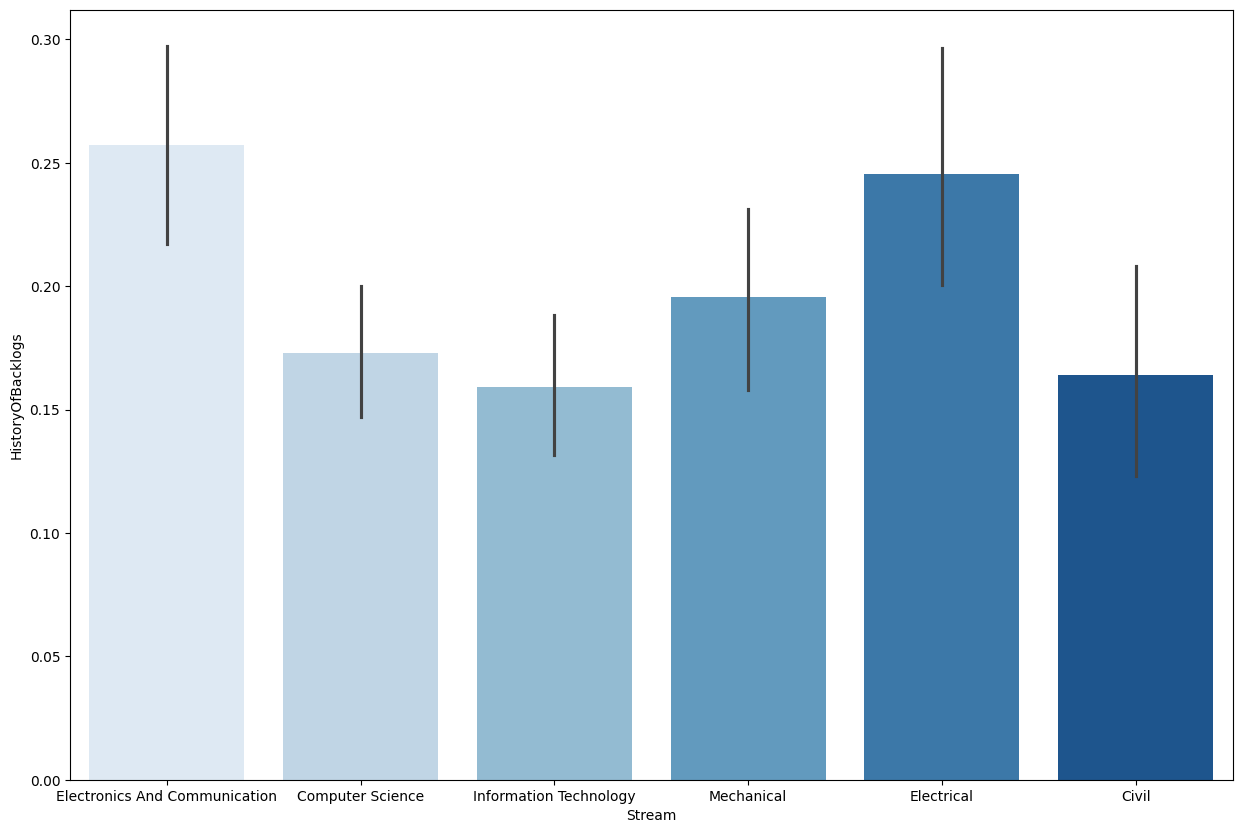

In [90]:
plt.figure(figsize=(15,10))
sns.barplot(x='Stream',y='HistoryOfBacklogs',data=df,palette='Blues')
plt.show()

# **Preprocessing**

In [91]:
df.isna().sum()

,0
Age,1
Gender,1
Stream,1
Internships,0
CGPA,5
Hostel,4
HistoryOfBacklogs,1
PlacedOrNot,1
reference,2943


In [92]:
mde=df['CGPA'].mode()[0]
mde

7.0

In [93]:
df['CGPA']=df['CGPA'].fillna(mde)

In [94]:
mde1=df['Hostel'].mode()[0]
mde1

0.0

In [95]:
df['Hostel']=df['Hostel'].fillna(mde1)

In [96]:
df.isna().sum()

,0
Age,1
Gender,1
Stream,1
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,1
PlacedOrNot,1
reference,2943


In [97]:
df.drop('reference',axis=1,inplace=True)
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22.0,Male,Electronics And Communication,1,8.0,1.0,1.0,1.0
1,21.0,Female,Computer Science,0,7.0,1.0,1.0,1.0
2,22.0,Female,Information Technology,1,6.0,0.0,0.0,1.0
3,21.0,Male,Information Technology,0,8.0,0.0,1.0,1.0
4,22.0,Male,Mechanical,0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2961,23.0,Male,Information Technology,0,7.0,0.0,0.0,0.0
2962,23.0,Male,Mechanical,1,7.0,1.0,0.0,0.0
2963,22.0,Male,Information Technology,1,7.0,0.0,0.0,0.0
2964,22.0,Male,Computer Science,1,7.0,0.0,0.0,0.0


In [98]:
df=df.dropna()
df.reset_index(drop=True,inplace=True)
df.isna().sum()

,0
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


# **Datatype conversion**

In [99]:
df.dtypes

,0
Age,float64
Gender,object
Stream,object
Internships,int64
CGPA,float64
Hostel,float64
HistoryOfBacklogs,float64
PlacedOrNot,float64


In [100]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22.0,1,Electronics And Communication,1,8.0,1.0,1.0,1.0
1,21.0,0,Computer Science,0,7.0,1.0,1.0,1.0
2,22.0,0,Information Technology,1,6.0,0.0,0.0,1.0
3,21.0,1,Information Technology,0,8.0,0.0,1.0,1.0
4,22.0,1,Mechanical,0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2960,23.0,1,Information Technology,0,7.0,0.0,0.0,0.0
2961,23.0,1,Mechanical,1,7.0,1.0,0.0,0.0
2962,22.0,1,Information Technology,1,7.0,0.0,0.0,0.0
2963,22.0,1,Computer Science,1,7.0,0.0,0.0,0.0


In [102]:
df['Stream']=df['Stream'].map({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4, 'Civil': 5})
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22.0,1,0,1,8.0,1.0,1.0,1.0
1,21.0,0,1,0,7.0,1.0,1.0,1.0
2,22.0,0,2,1,6.0,0.0,0.0,1.0
3,21.0,1,2,0,8.0,0.0,1.0,1.0
4,22.0,1,3,0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2960,23.0,1,2,0,7.0,0.0,0.0,0.0
2961,23.0,1,3,1,7.0,1.0,0.0,0.0
2962,22.0,1,2,1,7.0,0.0,0.0,0.0
2963,22.0,1,1,1,7.0,0.0,0.0,0.0


In [103]:
df.dtypes

,0
Age,float64
Gender,int64
Stream,int64
Internships,int64
CGPA,float64
Hostel,float64
HistoryOfBacklogs,float64
PlacedOrNot,float64


# **Feature-target seperation**

In [104]:
x=df.iloc[:,:-1]
x

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22.0,1,0,1,8.0,1.0,1.0
1,21.0,0,1,0,7.0,1.0,1.0
2,22.0,0,2,1,6.0,0.0,0.0
3,21.0,1,2,0,8.0,0.0,1.0
4,22.0,1,3,0,8.0,1.0,0.0
...,...,...,...,...,...,...,...
2960,23.0,1,2,0,7.0,0.0,0.0
2961,23.0,1,3,1,7.0,1.0,0.0
2962,22.0,1,2,1,7.0,0.0,0.0
2963,22.0,1,1,1,7.0,0.0,0.0


In [105]:
y=df.iloc[:,-1]
y

,PlacedOrNot
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2960,0.0
2961,0.0
2962,0.0
2963,0.0


# **Train-test split**

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [107]:
x_train.shape,y_train.shape

((2075, 7), (2075,))

In [108]:
x_test.shape,y_test.shape

((890, 7), (890,))

# **Model creation**

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
from sklearn.svm import SVC
sv=SVC()
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from xgboost import XGBClassifier
xgb=XGBClassifier()
from sklearn.metrics import classification_report

In [110]:
models=[knn,sv,nb,dt,rf,adb,gbc,xgb]
for model in models:
  print('_______________',model,'_________________')
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

_______________ KNeighborsClassifier(n_neighbors=13) _________________
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       418
         1.0       0.91      0.86      0.88       472

    accuracy                           0.88       890
   macro avg       0.88      0.88      0.88       890
weighted avg       0.88      0.88      0.88       890

_______________ SVC() _________________
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       418
         1.0       0.76      0.81      0.78       472

    accuracy                           0.76       890
   macro avg       0.76      0.76      0.76       890
weighted avg       0.76      0.76      0.76       890

_______________ GaussianNB() _________________
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       418
         1.0       0.82      0.83      0.82       472

    accuracy            

# **Visual representation of Accuracy score**

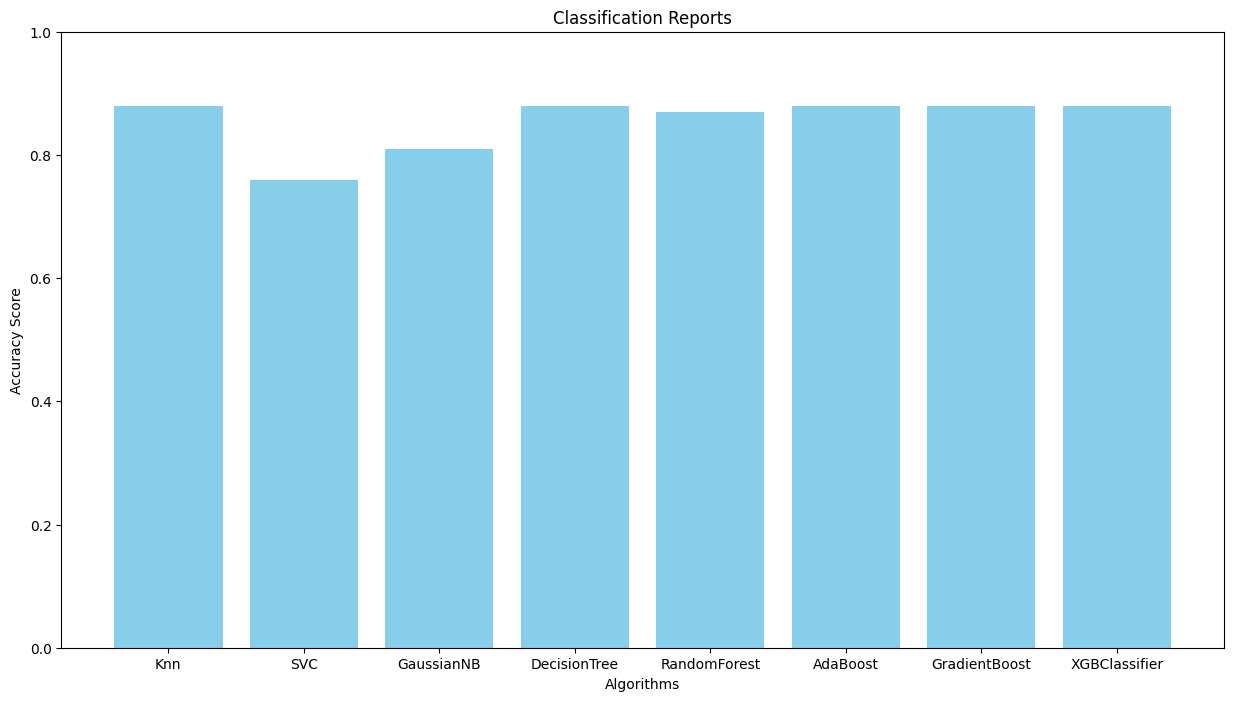

In [111]:
classification_reports={"Knn":0.88,"SVC":0.76,"GaussianNB":0.81,"DecisionTree":0.88,"RandomForest":.87,"AdaBoost":0.88,"GradientBoost":0.88,"XGBClassifier":0.88}
labels=list(classification_reports.keys())
score=list(classification_reports.values())
plt.figure(figsize=(15,8))
plt.bar(labels,score,color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Classification Reports')
plt.ylim(0,1)
plt.show()

# **Feature Selection**

In [112]:
df.corr()['PlacedOrNot']

,PlacedOrNot
Age,0.047061
Gender,-0.006842
Stream,-0.081536
Internships,0.178919
CGPA,0.588964
Hostel,-0.038006
HistoryOfBacklogs,-0.022193
PlacedOrNot,1.000000


In [114]:
x1=x.drop(['Gender'],axis=1)
x1

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22.0,0,1,8.0,1.0,1.0
1,21.0,1,0,7.0,1.0,1.0
2,22.0,2,1,6.0,0.0,0.0
3,21.0,2,0,8.0,0.0,1.0
4,22.0,3,0,8.0,1.0,0.0
...,...,...,...,...,...,...
2960,23.0,2,0,7.0,0.0,0.0
2961,23.0,3,1,7.0,1.0,0.0
2962,22.0,2,1,7.0,0.0,0.0
2963,22.0,1,1,7.0,0.0,0.0


In [115]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=.3,random_state=1)

In [116]:
for model in models:
  print('_______________',model,'_________________')
  model.fit(x1_train,y1_train)
  y1_pred=model.predict(x1_test)
  print(classification_report(y1_test,y1_pred))

_______________ KNeighborsClassifier(n_neighbors=13) _________________
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       418
         1.0       0.91      0.85      0.88       472

    accuracy                           0.87       890
   macro avg       0.87      0.87      0.87       890
weighted avg       0.87      0.87      0.87       890

_______________ SVC() _________________
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       418
         1.0       0.76      0.81      0.79       472

    accuracy                           0.77       890
   macro avg       0.77      0.76      0.76       890
weighted avg       0.77      0.77      0.77       890

_______________ GaussianNB() _________________
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       418
         1.0       0.81      0.83      0.82       472

    accuracy            

# **Visual representation of accuracy score after Feature selection**

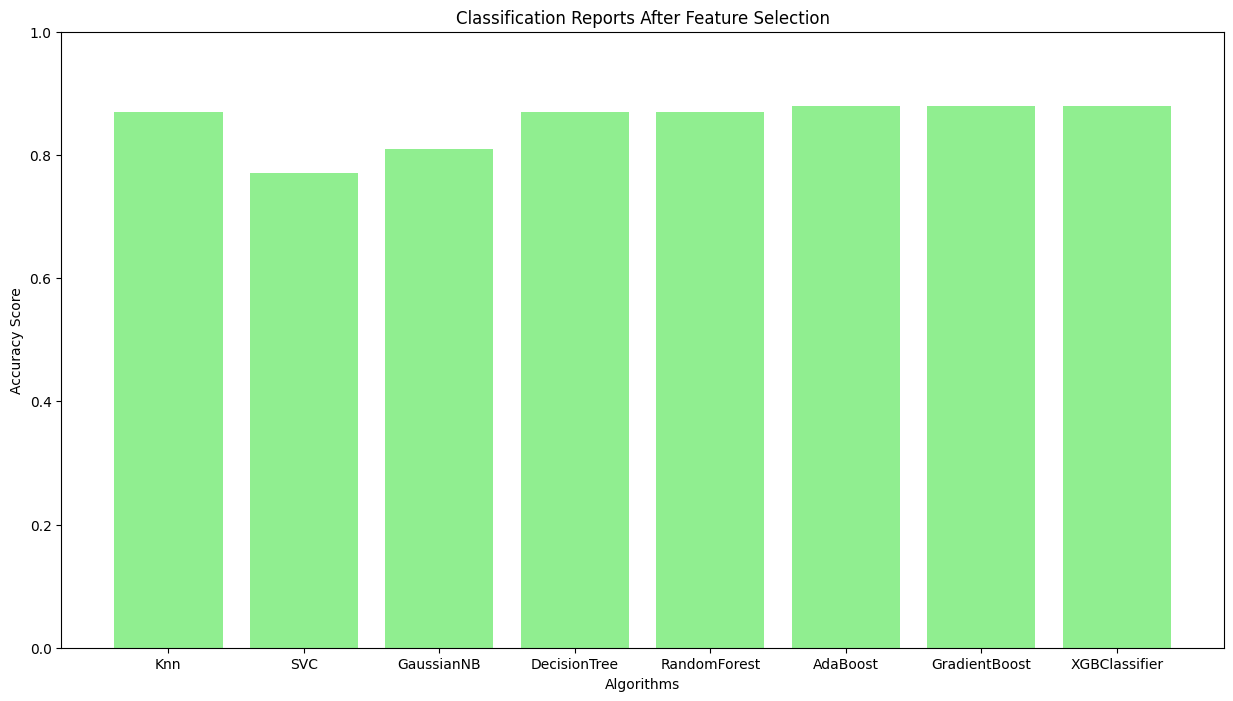

In [117]:
classification_reports1={"Knn":0.87,"SVC":0.77,"GaussianNB":0.81,"DecisionTree":0.87,"RandomForest":.87,"AdaBoost":0.88,"GradientBoost":0.88, "XGBClassifier":0.88}
labels1=list(classification_reports1.keys())
score1=list(classification_reports1.values())
plt.figure(figsize=(15,8))
plt.bar(labels1,score1,color='lightgreen')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Classification Reports After Feature Selection')
plt.ylim(0,1)
plt.show()

# **Hyper parameter tuning**

**1. K neighbors**

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={'n_neighbors':[3,5,7,11,13],
'weights':['uniform','distance'],
'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=RandomizedSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 11, 13],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [119]:
print(clf.best_params_)

{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'auto'}


In [120]:
knn1=KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='kd_tree')
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=11, weights='distance')

In [121]:
y_pred1=knn1.predict(x_test)
y_pred1

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0.

In [122]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       418
         1.0       0.90      0.86      0.88       472

    accuracy                           0.87       890
   macro avg       0.87      0.88      0.87       890
weighted avg       0.88      0.87      0.87       890



**2. Random forest**

In [123]:
params={'criterion':['gini','entropy','log_loss'],
'max_features':['sqrt','log2',None],
'warm_start':[True,False]}
clf1=RandomizedSearchCV(rf,params,cv=10,scoring='accuracy')
clf1.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'warm_start': [True, False]},
                   scoring='accuracy')

In [124]:
print(clf1.best_params_)

{'warm_start': True, 'max_features': None, 'criterion': 'log_loss'}


In [125]:
rf1=RandomForestClassifier(criterion='log_loss',max_features=None,warm_start=False)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_features=None)

In [126]:
y_pred2=rf1.predict(x_test)
y_pred2

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [127]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       418
         1.0       0.91      0.86      0.88       472

    accuracy                           0.88       890
   macro avg       0.88      0.88      0.88       890
weighted avg       0.88      0.88      0.88       890



**3. Decision Tree**

In [128]:
params={'criterion':['gini','entropy','log_loss'],
'splitter':['best','random'],
'max_depth':[1,2,3,4,5,6,7,8,9]}
clf2=GridSearchCV(dt,params,cv=10,scoring='accuracy')
clf2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [129]:
print(clf2.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


In [130]:
dt1=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=7)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [131]:
y_pred3=dt1.predict(x_test)
y_pred3

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [132]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       418
         1.0       0.94      0.83      0.88       472

    accuracy                           0.88       890
   macro avg       0.88      0.88      0.88       890
weighted avg       0.89      0.88      0.88       890



**4. Adaboost**

In [133]:
params={'n_estimators':[10,20,30,40,50,60],
'algorithm':['SAMME','SAMME.R']}
clf3=GridSearchCV(adb,params,cv=10,scoring='accuracy')
clf3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 20, 30, 40, 50, 60]},
             scoring='accuracy')

In [134]:
print(clf3.best_params_)

{'algorithm': 'SAMME.R', 'n_estimators': 50}


In [135]:
adb1=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R',random_state=1)
adb1.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [136]:
y_pred4=adb1.predict(x_test)
y_pred4

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [137]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       418
         1.0       0.93      0.83      0.88       472

    accuracy                           0.88       890
   macro avg       0.88      0.88      0.88       890
weighted avg       0.89      0.88      0.88       890



**In Here RandomForest, DecisionTree and Adaboost shows same accuracy, So we choosing DecisionTree as our Machine Learning model.**